<h2 style="
  color: #FFFFFF; 
  background: linear-gradient(90deg, #FF512F, #DD2476); 
  padding: 12px 20px; 
  text-align: center; 
  border-radius: 10px; 
  font-family: 'Georgia', serif; 
  font-weight: 600; 
  font-size: 28px;
  box-shadow: 0 4px 12px rgba(0,0,0,0.3);
">
AUTOGLUON - LUNG CANCER ANALYSIS
</h2>


<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold; font-size: 24px;">
IMPORT LIBRARIES
</h4>

In [3]:
!pip install autogluon --quiet

In [74]:
from autogluon.tabular import TabularPredictor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold; font-size: 24px;">
DATA LOADING
</h4>

In [6]:
data = pd.read_csv("lung_cancer_examples.csv")
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold; font-size: 24px;">
DATA CLEANING & PRE-PROCESSING
</h4>

In [8]:
data.shape

(59, 7)

In [9]:
data.size

413

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [11]:
data.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [12]:
data.duplicated().sum

<bound method Series.sum of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
dtype: bool>

In [13]:
data.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold; font-size: 24px;">
EXPLORATORY DATA ANALYSIS (EDA)
</h4>

## BOX PLOT

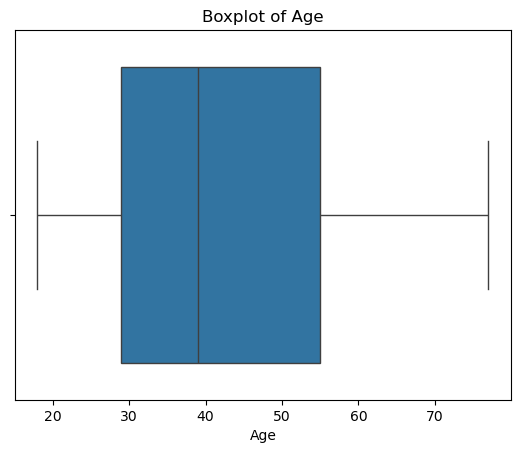

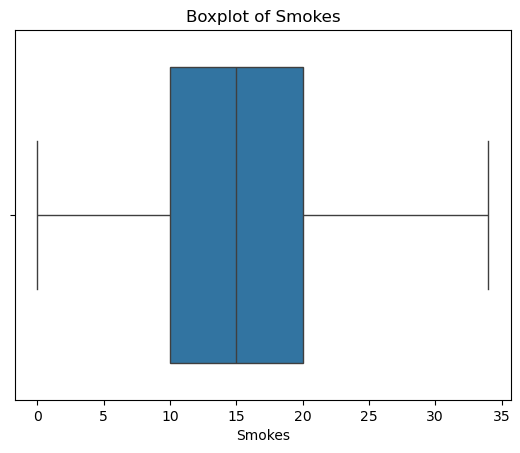

In [16]:
for col in ['Age', 'Smokes',]:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## PAIR PLOT

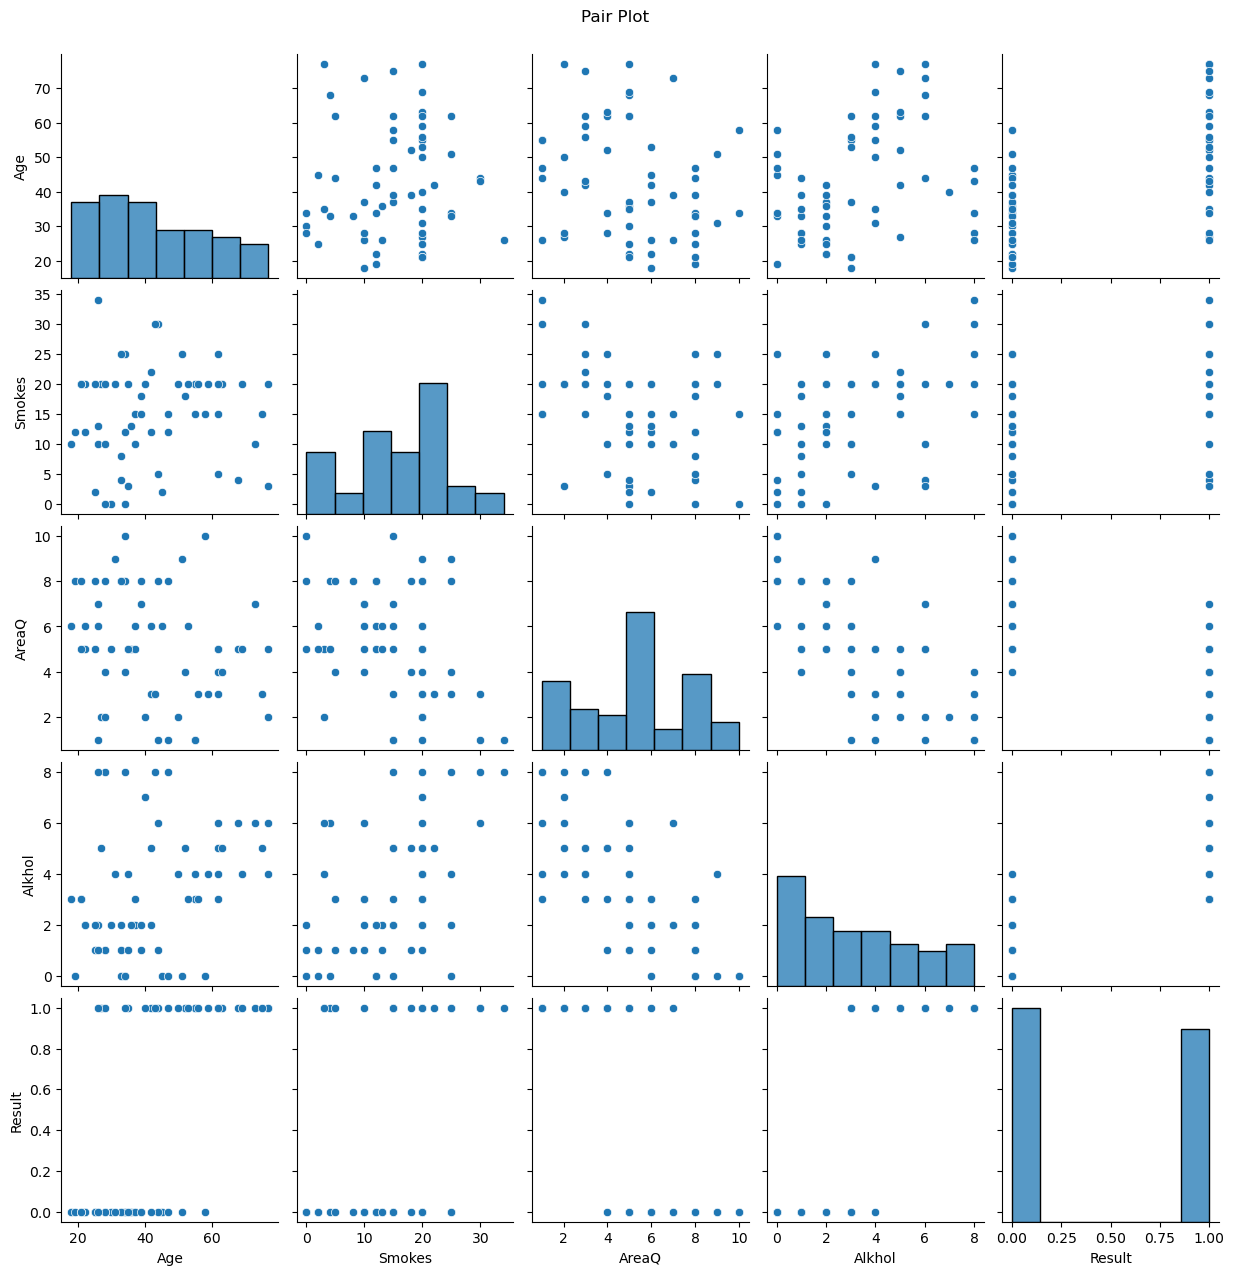

In [18]:
sns.pairplot(data)
plt.suptitle("Pair Plot", y=1.02)
plt.show()

## HEAT MAP

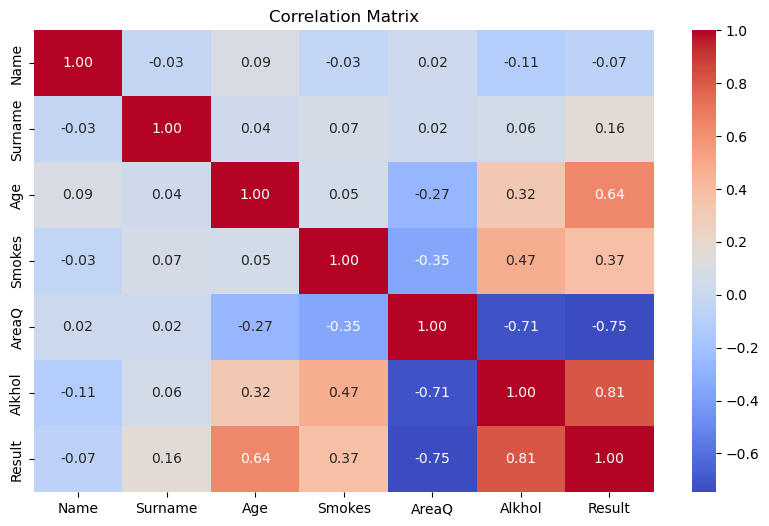

In [20]:
from sklearn.preprocessing import LabelEncoder
df = data.copy()
for col in df.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(df[col])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## HIST PLOT

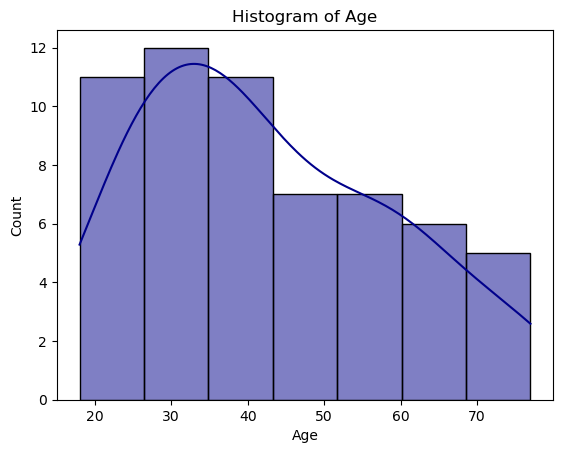

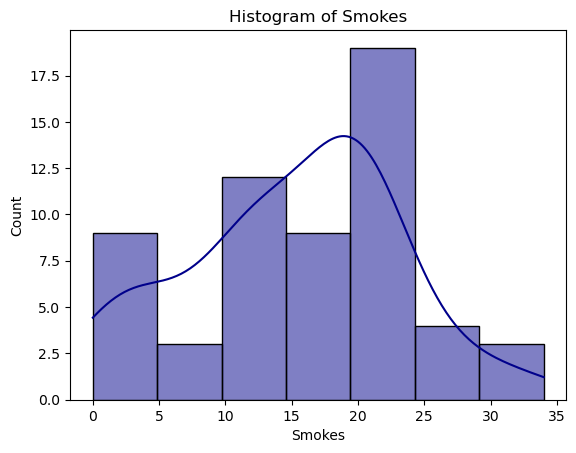

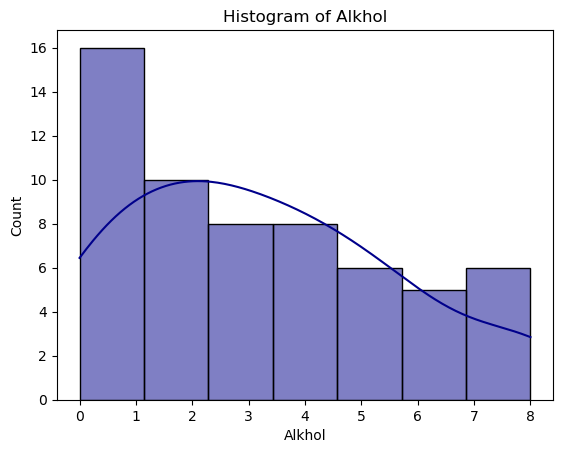

In [22]:
numerical = ['Age', 'Smokes', 'Alkhol']

for col in numerical:
    sns.histplot(data[col], kde=True, color='darkblue')
    plt.title(f"Histogram of {col}")
    plt.show()

<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold; font-size: 24px;">
OUTLIER CHECKING & HANDLING
</h4>

In [24]:
num_data=data.select_dtypes(include='int')
num_data

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,27,47,35,3,5,4,1
1,27,7,27,20,2,5,1
2,5,0,30,0,5,2,0
3,1,44,28,0,8,1,0
4,10,28,68,4,5,6,1
5,8,36,34,0,10,0,0
6,35,43,58,15,10,0,0
7,30,1,22,12,5,2,0
8,36,24,45,2,6,0,0
9,40,31,52,18,4,5,1


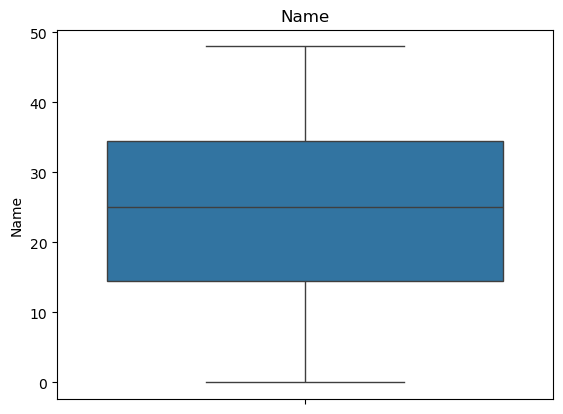

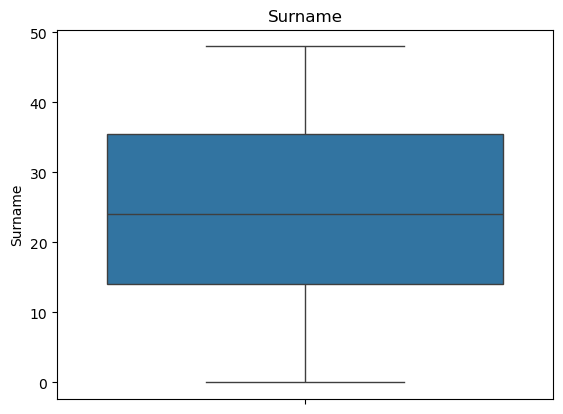

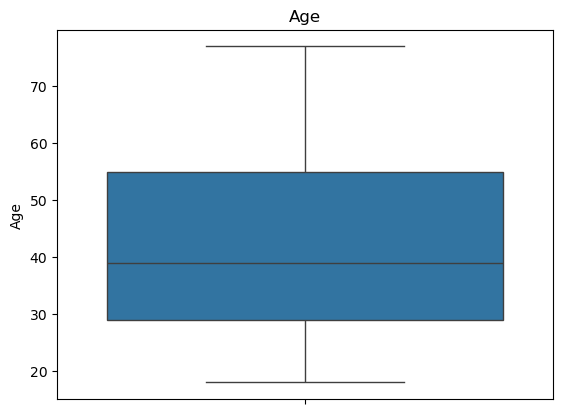

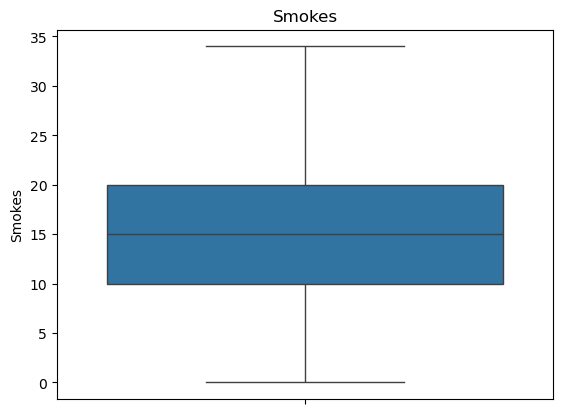

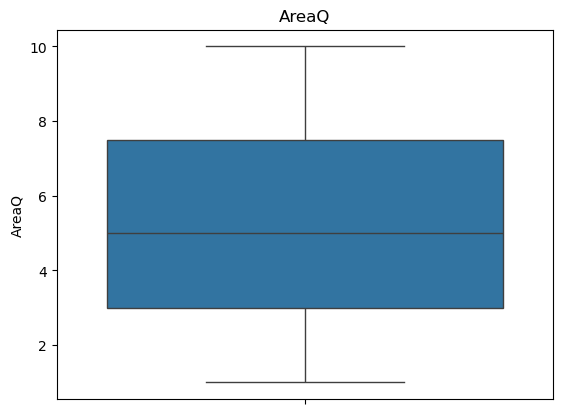

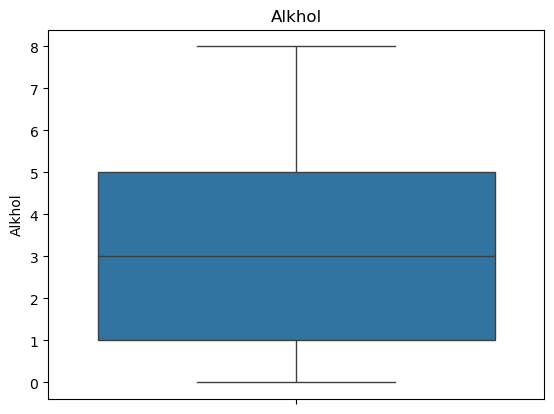

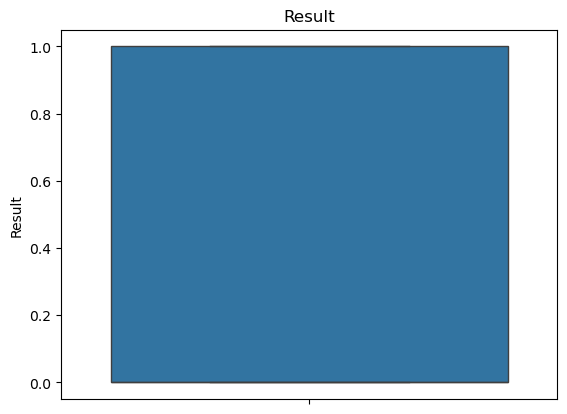

In [54]:
for i in num_data:
    plt.title(i)
    sns.boxplot(num_data[i])
    plt.show()

<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold; font-size: 24px;">
SPLITTING FOR TRAIN AND TEST
</h4>

In [70]:
X = data.drop(columns=['Result'])
y = data['Result']

In [83]:
X

,Name,Surname,Age,Smokes,AreaQ,Alkhol
0,27,47,35,3,5,4
1,27,7,27,20,2,5
2,5,0,30,0,5,2
3,1,44,28,0,8,1
4,10,28,68,4,5,6
5,8,36,34,0,10,0
6,35,43,58,15,10,0
7,30,1,22,12,5,2
8,36,24,45,2,6,0
9,40,31,52,18,4,5


In [85]:
y

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    1
15    0
16    1
17    0
18    1
19    1
20    1
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    1
38    0
39    0
40    1
41    0
42    1
43    1
44    0
45    0
46    0
47    0
48    1
49    1
50    0
51    1
52    1
53    0
54    0
55    1
56    1
57    1
58    0
Name: Result, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold; font-size: 24px;">
PREDICTION
</h4>

In [30]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20251016_070212"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       1.91 GB / 15.69 GB (12.2%)
Disk Space Avail:   239.78 GB / 929.62 GB (25.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU memory.
	presets='best'    : Maximize accu

In [31]:
predictions = predictor.predict(test_data)
print(predictions)

7     0
10    0
14    1
18    0
20    1
22    0
28    1
38    0
42    1
48    1
51    1
58    0
Name: Result, dtype: int64


In [32]:
predictor.evaluate(test_data)

{'accuracy': 0.9166666666666666,
 'balanced_accuracy': 0.9285714285714286,
 'mcc': 0.8451542547285166,
 'roc_auc': 1.0,
 'f1': 0.9230769230769231,
 'precision': 1.0,
 'recall': 0.8571428571428571}